# Diabetes Prediction

### Used classification method of supervised learning
()

In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

### Read data

In [201]:
pima = pd.read_csv('diabetes.csv')

In [202]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [203]:
#pima.tail()

In [204]:
#pima.count()

In [205]:
#pima.info()

In [206]:
#pima.describe()

In [207]:
#data.plot.pie(y='Outcome', figsize=(5, 5))

In [226]:
#data.Pregnancies.unique()

# Data Visualize

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd1334fea90>,
      dtype=object)

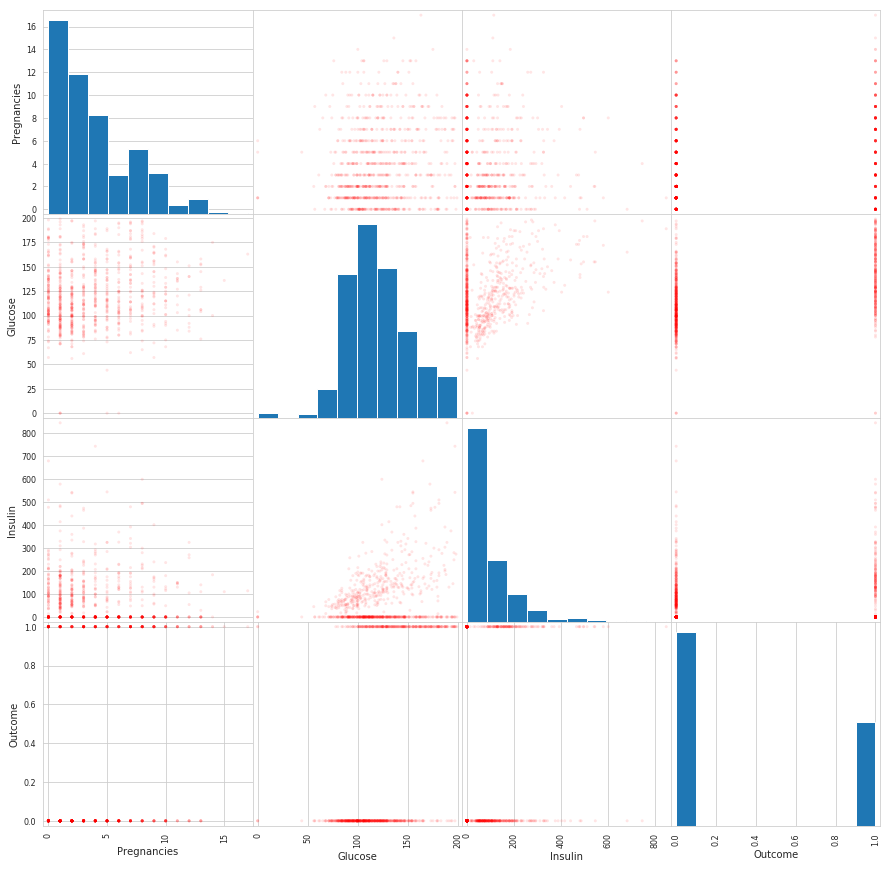

In [232]:
# matrix plot of four features
df = pd.DataFrame()
df['Pregnancies'] = data.Pregnancies
df['Glucose'] = data.Glucose
df['Insulin'] = data.Insulin
df['Outcome'] = data.Outcome
pd.plotting.scatter_matrix(df, alpha=0.1,color='red', figsize=(15,15), diagonal = 'hist')

Text(0.5, 1.0, ' ')

<Figure size 432x288 with 0 Axes>

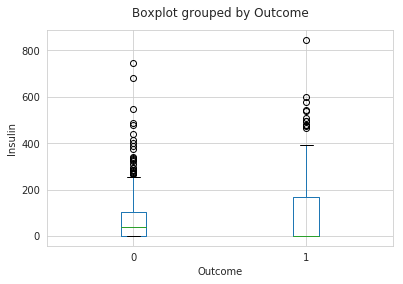

In [244]:
# Box plot: Insulin level Vs diabetes
plt.figure()
x = df.boxplot('Insulin', 'Outcome')
#x.set_xticklabels(['2', ' ', '4', ' ', '6', ' ', '8'])
x.set_xlabel('Outcome')
x.set_ylabel('Insulin')
x.set_title(' ')

### How many are diabetes patients

Text(0, 0.5, 'People')

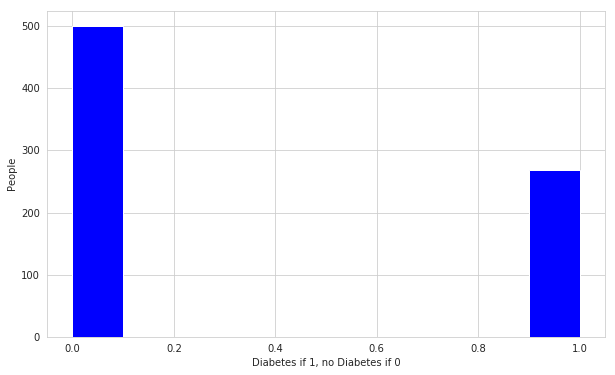

In [231]:
plt.figure(figsize=(10,6))
data['Outcome'].hist(color='b')
plt.xlabel('Diabetes if 1, no Diabetes if 0')
plt.ylabel('People')

In [228]:
total_count = pd.value_counts(data['Outcome'].values)
#print(total_count)
diabetes_patients = total_count[1]
healthy = total_count[0]
print("Diabetes patients: ", diabetes_patients)
print("Healthy: ", healthy)

Diabetes patients:  268
Healthy:  500


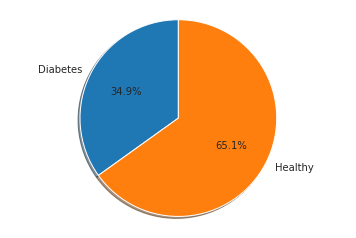

In [230]:
# Pie chart: diabetes vs healthy people
labels = 'Diabetes', 'Healthy'
samples = [diabetes_patients, healthy]
fig1, ax1 = plt.subplots()
ax1.pie(samples, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
plt.show()

### How insulin and glucose influence diabetes

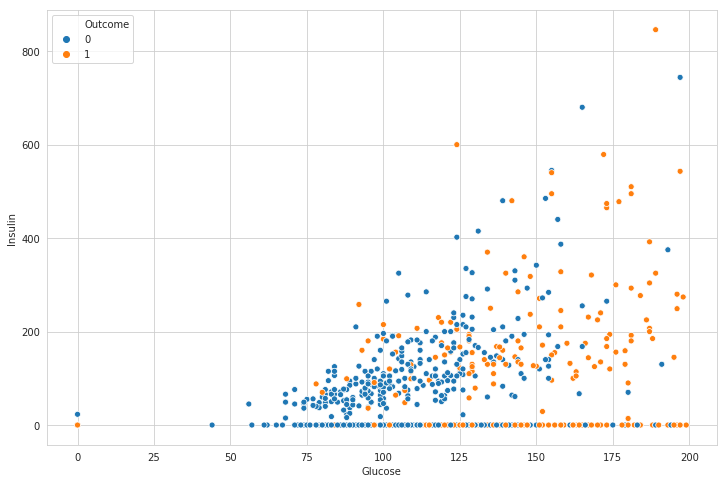

In [212]:
plt.figure(figsize=(12,8))
sns.scatterplot(data['Glucose'], data['Insulin'], hue = "Outcome",data=data)

### Create model

In [213]:
# Create model based on features:'Pregnancies', 'Insulin', 'BMI', 'Age'

In [170]:
features = ['Pregnancies', 'Insulin', 'BMI', 'Age']

In [171]:
X = pima[features]
y = pima.Outcome

In [172]:
from sklearn.model_selection import train_test_split

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [174]:
from sklearn.linear_model import LogisticRegression

In [175]:
model1 = LogisticRegression()

In [176]:
model1.fit(X_train, y_train)

/home/uib14108/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [177]:
prediction1 = model1.predict(X_test)

In [178]:
# How many people have diabetes in test data
y_test.value_counts()

0    157
1     74
Name: Outcome, dtype: int64

In [179]:
# Average people have diabetes in test data
y_test.mean()

0.3203463203463203

In [180]:
#print("True diabetes label(first 20 people) :  ", y_test.values[0:20])
#print("Predicted diabetes (first 20 people) :  ", prediction1[0:20])

### Evaluate model

In [181]:
from sklearn import metrics

In [182]:
# Accuracy of model
print("Accuracy: ", metrics.accuracy_score(y_test, prediction1))

Accuracy:  0.696969696969697


In [183]:
# Evaluate using confusion_matrix
print("Confusion metrics:\n",metrics.confusion_matrix(y_test, prediction1))
# 142 - True positive; 15 - False positive
# 55 - False negative; 19 - true negative
# True positive means our model correctly predicted those people have diabetes - 142.
# True negative means our model correctly predicted those people who do not have diabetes - 19.
# False positive is type-1 error: actual value was false but model predicted true.
# False negative is type-2 error: actual value was true but model predicted false.

Confusion metrics:
 [[142  15]
 [ 55  19]]


In [184]:
# Model accuracy found above is 0.69 so remaining is error.
# accuracy = (TP+TN)/(TP+TN+FP+FN)
# error = (FP+FN)/(TP+TN+FP+FN)

In [185]:
# sensitivity of model
# sensitivity means when value is positive how well our prediction is correct
# sensitivity = TP/(TP+FN)
print("Sensitivity: ", metrics.recall_score(y_test, prediction1))

Sensitivity:  0.25675675675675674


In [186]:
# specificity is opposite of sensitivity
# specificity means how often model predict correct when actual value is negative

In [187]:
# Precision of model 
print("Precision: ", metrics.precision_score(y_test, prediction1))

Precision:  0.5588235294117647
